In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci

pd.set_option('float_format', '{:6.4f}'.format)
sns.set(style='ticks')

import warnings
warnings.filterwarnings("ignore")

In [2]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12,4

In [3]:
df=pd.read_csv('retail.csv',skiprows=1,index_col=0)['A3349335T']

In [4]:
df.head()

Month
Apr-1982   303.1000
May-1982   297.8000
Jun-1982   298.0000
Jul-1982   307.9000
Aug-1982   299.2000
Name: A3349335T, dtype: float64

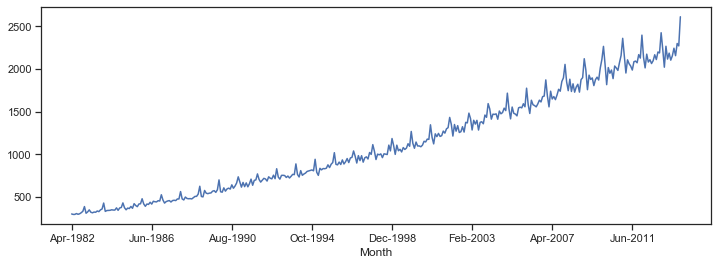

In [5]:
#2
fig = plt.figure(figsize=(12,4))
df.plot()
plt.show()

It doesn't seem to be stationary. We see that there is some upward trend as well as growing sesonality. Therefore we can't say that this series is stationary

In [6]:
#3
print(df.head(),df.tail())

Month
Apr-1982   303.1000
May-1982   297.8000
Jun-1982   298.0000
Jul-1982   307.9000
Aug-1982   299.2000
Name: A3349335T, dtype: float64 Month
Aug-2013   2244.2000
Sep-2013   2157.0000
Oct-2013   2299.5000
Nov-2013   2271.3000
Dec-2013   2612.8000
Name: A3349335T, dtype: float64


In [7]:
percent = ((df-df.shift(1))/df.shift(1)*100).dropna()
series_log = df.map(lambda x: np.log(x))
difference_log = ((series_log - series_log.shift(1))*100).dropna()

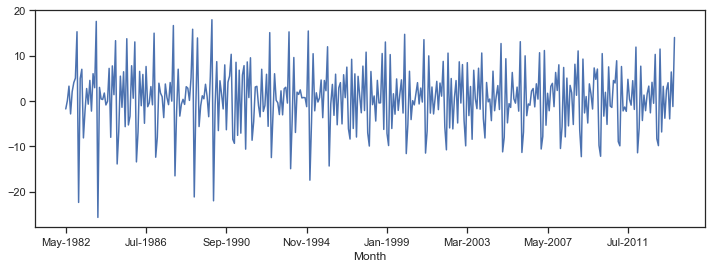

In [8]:
#log
fig = plt.figure(figsize=(12,4))
difference_log.plot()
plt.show()

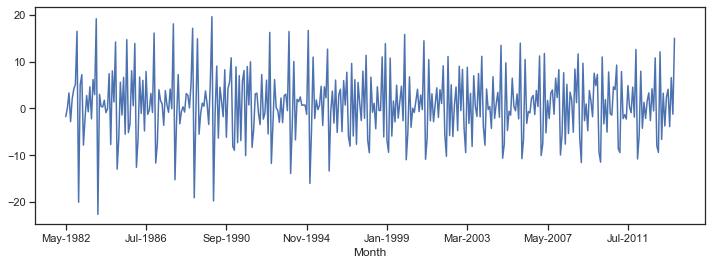

In [9]:
#month-to-month percentage change
fig = plt.figure(figsize=(12,4))
percent.plot()
plt.show()

In [10]:
print('month-to-month percentage change',percent.describe(),'\n','log difference',difference_log.describe(),sep='\n')

month-to-month percentage change
count   380.0000
mean      0.8137
std       7.0126
min     -22.6735
25%      -3.4285
50%       0.5447
75%       5.0744
max      19.6319
Name: A3349335T, dtype: float64


log difference
count   380.0000
mean      0.5669
std       7.0108
min     -25.7133
25%      -3.4887
50%       0.5432
75%       4.9498
max      17.9249
Name: A3349335T, dtype: float64


In [11]:
print('skewness','non log',sci.skew(percent.dropna()),'log',sci.skew(difference_log.dropna()))
print('kurtosis','non log',sci.kurtosis(percent.dropna()),'log',sci.kurtosis(difference_log.dropna()))

skewness non log -0.02466376635532852 log -0.2791698257424146
kurtosis non log 0.3148674875737121 log 0.5993833838696214


It looks much better compared to the first plotting, it has the stationary mean and pratically the stationary volatility in both computations, but despite of that there is minor seasonal volatility. We see that the volatility is quite larger at the beginning. If we take a look at different computations we may see that they are practically similar except minor distinct features, especially kurtosis, mean, min and max values. log computation has more heavier tails compared to non log one.

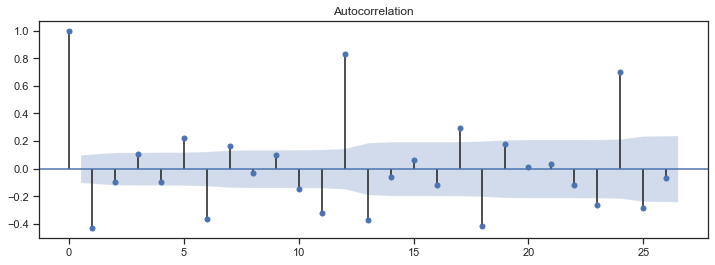

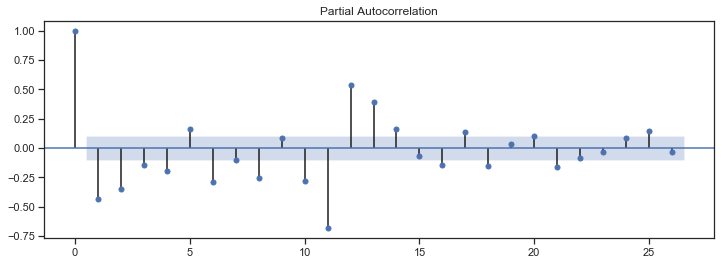

In [12]:
#4
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(percent)
plot_pacf(percent)
plt.show()

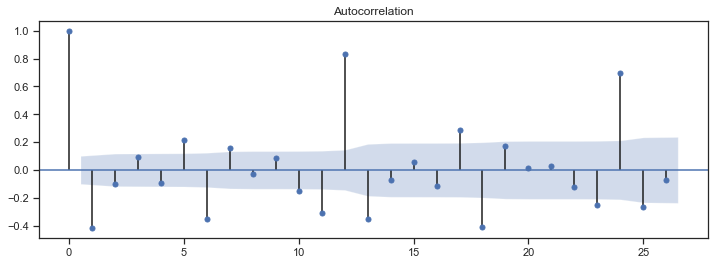

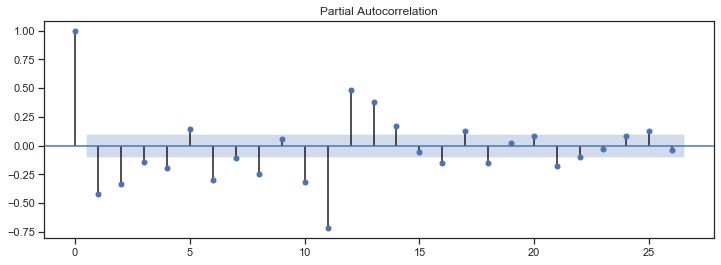

In [13]:
plot_acf(difference_log)
plot_pacf(difference_log)
plt.show()

We see that there is still quite high correlation through several lags despite of our changes it looks that this process has seasonality. PACF and ACF show that it is not a stationary process.

In [14]:
#5
percent_year = ((df-df.shift(12))/df.shift(12)*100).dropna()
difference_log_year = ((series_log - series_log.shift(12))*100).dropna()

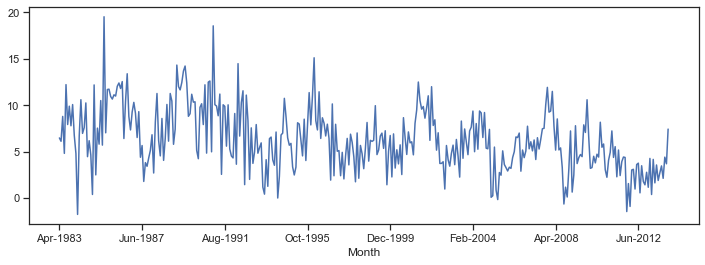

In [15]:
#log_year
fig = plt.figure(figsize=(12,4))
difference_log_year.plot()
plt.show()

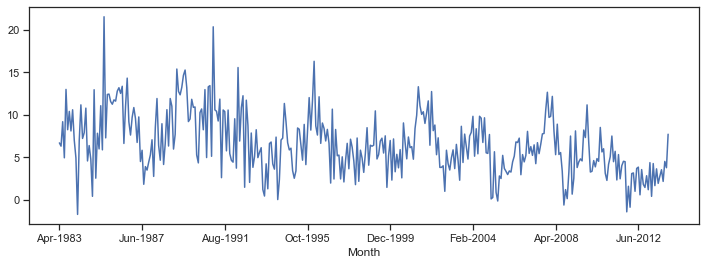

In [16]:
#year-to-year percentage change
fig = plt.figure(figsize=(12,4))
percent_year.plot()
plt.show()

It doesn't look better compared to the previous plots. We may see a little downward trend, quite high correlation between lags if we compare it with the previous one. Also the volatility becomes lower throughout the time.

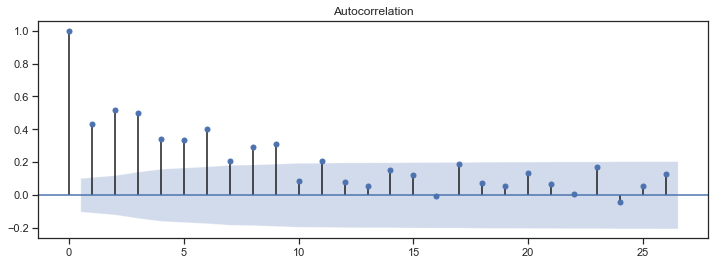

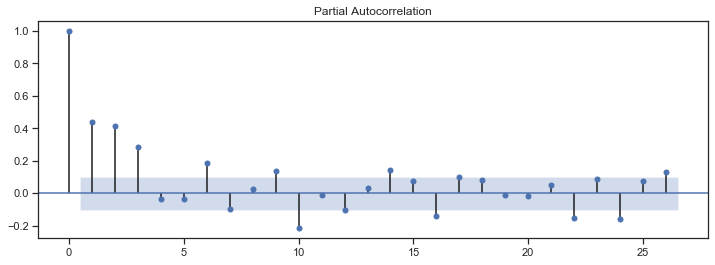

In [17]:
plot_acf(difference_log_year)
plot_pacf(difference_log_year)
plt.show()

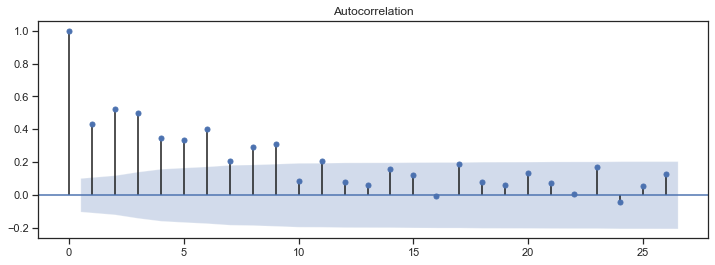

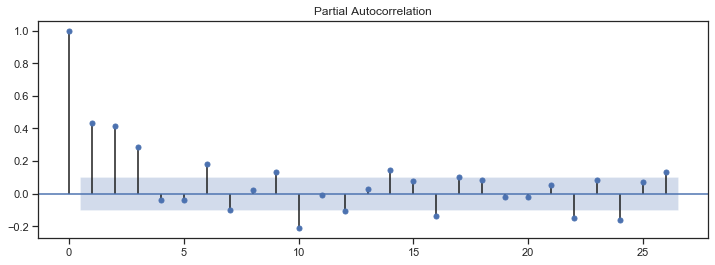

In [18]:
plot_acf(percent_year)
plot_pacf(percent_year)
plt.show()

Our hypothesis is confirmed looking at these plots, there is quite high correlation. if we go further although it still exists.

#Problem_2

In [19]:
#1
df_ex = pd.read_csv('eurusd.csv',index_col=0)[::-1]

In [20]:
#2
df_ex['ln'] = df_ex['avgeurusd'].map(lambda x: np.log(x))

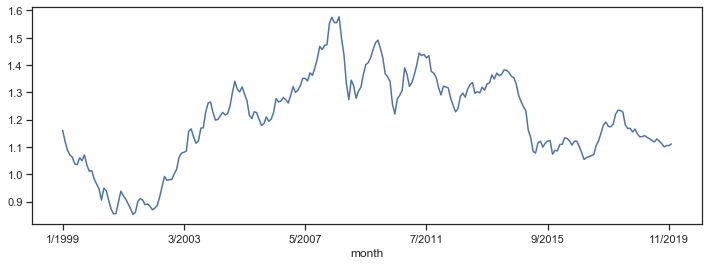

In [21]:
df_ex.avgeurusd.plot()

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(df_ex.avgeurusd[:240],order=(3 ,2, 0))
model_arima_fit = model_arima.fit()

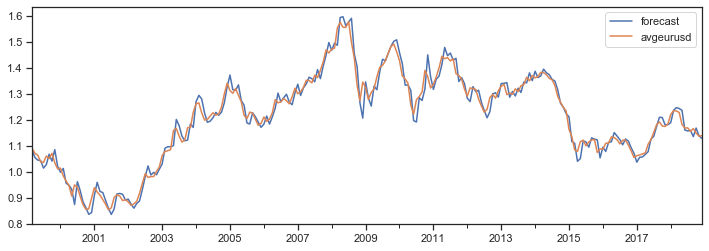

In [24]:
model_arima_fit.plot_predict()
plt.show()

In [177]:
predictions = model_arima_fit.forecast(steps=12)[0]

In [178]:
predictions

array([1.13824325, 1.13232623, 1.12703367, 1.12449663, 1.12196602,
       1.11838876, 1.11490365, 1.11204375, 1.10933077, 1.10650713,
       1.10376857, 1.10123963])

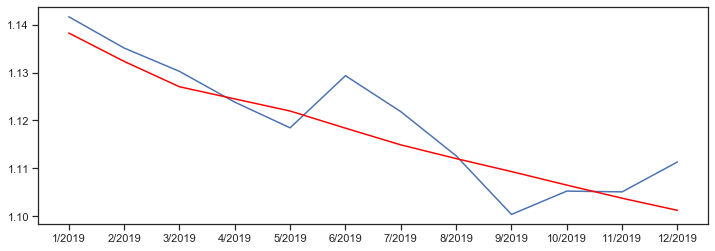

In [179]:
plt.plot(df_ex['avgeurusd'][240:])
plt.plot(predictions,color='red')

In [180]:
model_arima_fit.bic

-973.4804167905568

In [181]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_ex['avgeurusd'][240:],predictions)

3.301221509003474e-05

In [100]:
df_ex['avgeurusd'][240:]

month
1/2019    1.1416
2/2019    1.1351
3/2019    1.1302
4/2019    1.1238
5/2019    1.1185
6/2019    1.1293
7/2019    1.1218
8/2019    1.1126
9/2019    1.1004
10/2019   1.1053
11/2019   1.1051
12/2019   1.1113
Name: avgeurusd, dtype: float64

In [63]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [271]:
df_rub = pd.read_csv('Прошлые данные - USD_RUB.csv',index_col = 3)[::-1]

In [273]:
df_rub['Макс.'] = df_rub['Макс.'].apply(lambda x: float(str(x).replace(',', '.')))

In [308]:
model_arima = ARIMA(df_rub['Макс.'],order=(3 ,2, 0))
model_arima_fit = model_arima.fit()

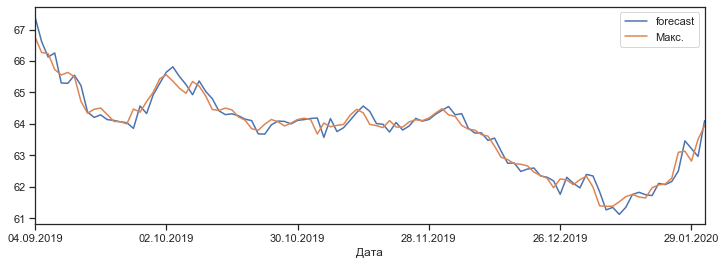

In [309]:
model_arima_fit.plot_predict()
plt.show()

In [310]:
predictions = model_arima_fit.forecast(steps = 7)[0]

In [311]:
predictions

array([64.06296604, 64.15157618, 64.56392599, 64.92732147, 65.14399965,
       65.36444588, 65.7016643 ])

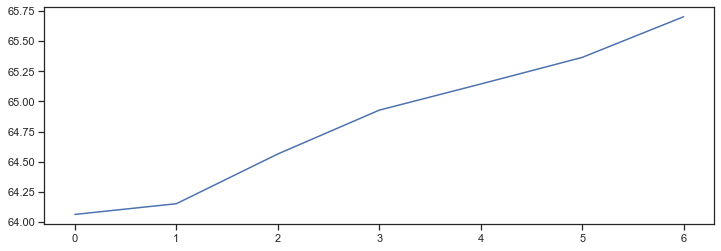

In [312]:
plt.plot(predictions)

In [251]:
for param in pdq:
    try:
        model_arima = ARIMA(df_rub['Макс.'],order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.bic)
    except:
        continue
    

(0, 0, 0) 356.17396777322625
(0, 0, 1) 240.88045027463426
(0, 1, 0) 18.05437048582421
(0, 1, 1) 16.088496178299216
(0, 1, 2) 20.33802670715483
(0, 1, 3) 24.962307927310214
(0, 1, 4) 23.917969168095123
(0, 2, 0) 61.971519046072714
(0, 2, 1) 21.836352173480183
(0, 2, 2) 22.96066059520608
(1, 0, 0) 27.05469822798976
(1, 0, 1) 24.045943833048188
(1, 0, 3) 33.22264717098531
(1, 0, 4) 31.986629056758545
(1, 1, 0) 17.463567751009897
(1, 1, 1) 22.818666614326965
(1, 2, 0) 55.00787544616645
(1, 2, 1) 24.249314254045245
(1, 2, 2) 27.121301677960755
(1, 2, 4) 34.110392354813754
(2, 0, 0) 25.26144169013965
(2, 0, 1) 28.674349216621515
(2, 1, 0) 20.545278248615837
(2, 1, 1) 24.741626940115772
(2, 1, 2) 28.879963020631987
(2, 2, 0) 40.57495487212087
(2, 2, 1) 24.159056222436302
(2, 2, 2) 31.230512306427336
(2, 2, 3) 30.349819801479313
(2, 2, 4) 38.896825138324374
(3, 0, 0) 37.81828959714874
(3, 0, 1) 33.14349546367683
(3, 0, 2) 34.9836943727347
(3, 1, 0) 23.2043548281379
(3, 1, 1) 24.24174833492891


In [21]:
r_diff = df_ex['ln'].diff(1).dropna()

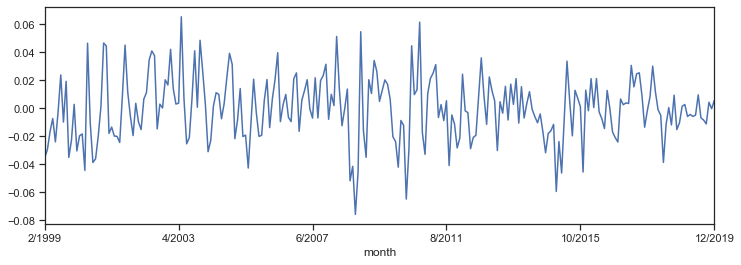

In [22]:
r_diff.plot()
plt.show()

In [23]:
# from functools import reduce
# lst = list()
# for i in range(1,252):
#     numb = reduce(lambda x,y: x*y,r[:i])
#     lst.append(numb)

In [24]:
# r = pd.DataFrame(r)
# r['compound'] = np.array(pd.Series(lst)

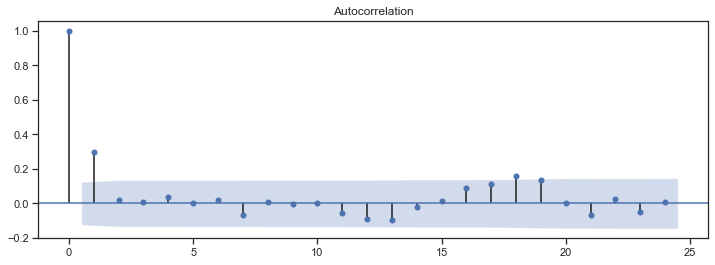

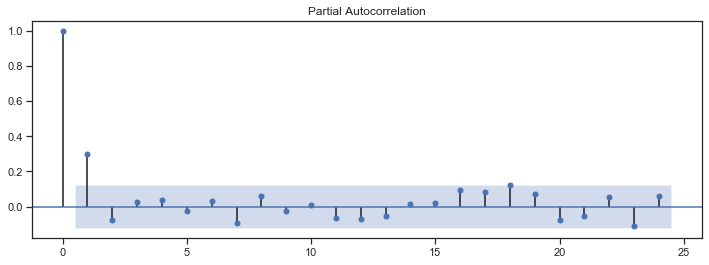

In [25]:
plot_acf(r_diff)
plot_pacf(r_diff)
plt.show()

In [27]:
sm.stats.acorr_ljungbox(r_diff, lags=[20])

(array([47.25810148]), array([0.00054009]))

H0 is regected, it means that there is some autocorrelation between some lags, looking at the plots we see that the first lag and the eighteenth lag are above the significance level. According to the plots, it seems to me that is ARMA(1,1)

In [65]:
#4
from statsmodels.tsa.arima_model import ARMA
model_arma = ARMA(r_diff,order=(12 , 12))
model_arma_fit = model_arma.fit()

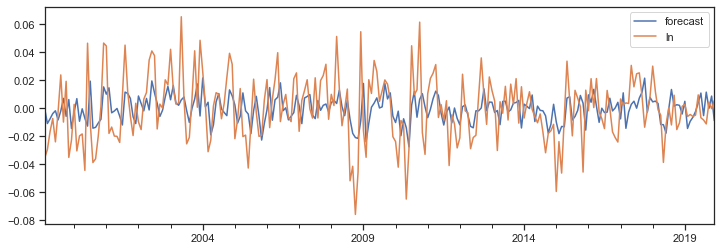

In [81]:
model_arma_fit.plot_predict()
plt.show()

In [68]:
print(model_arma_fit.aic,model_arma_fit.bic)

-1176.0127233861313 -1084.3509469687049


In [57]:
pq = list()
for i in range(0,9):
    for j in range(0,9):
        if i+j<=8:
            pq.append((i,j))

In [50]:
for param in pq:
    try:
        model_arma_exp = ARMA(r_diff,order=param)
        model_arma_fit_exp = model_arma_exp.fit()
        print(param,model_arma_fit_exp.aic,model_arma_fit_exp.bic)
    except:
        continue

(0, 0) -1180.095403973467 -1173.0444980952034
(0, 1) -1202.9661271621299 -1192.3897683447344
(0, 2) -1201.249578481259 -1187.1477667247318
(0, 3) -1199.37844702435 -1181.7511823286911
(0, 4) -1198.113342551825 -1176.9606249170345
(0, 5) -1196.3912940100786 -1171.7131234361561
(0, 6) -1195.7421489177386 -1167.5385254046844
(0, 7) -1195.1343248404678 -1163.4052483882817
(0, 8) -1193.1692710629422 -1157.9147416716244
(1, 0) -1201.7831577063462 -1191.2067988889507
(1, 1) -1201.2189533012324 -1187.1171415447052
(1, 2) -1202.9281104974107 -1185.3008458017518
(2, 0) -1201.1846359401543 -1187.082824183627
(2, 1) -1199.2532143643143 -1181.6259496686555
(2, 2) -1198.6187511999592 -1177.4660335651686
(2, 3) -1200.2823688919802 -1175.6041983180578
(2, 4) -1197.1935671217248 -1168.9899436086705
(3, 0) -1199.3284733361106 -1181.7012086404518
(3, 1) -1197.4356356778812 -1176.2829180430906
(3, 2) -1198.09786370758 -1173.4196931336576
(3, 3) -1197.177135958435 -1168.9735124453807
(3, 4) -1196.345211355

#5 
We got that the best model is (0,0), Bic is better for large data. According to criteria BiC the best models are (0,8) (8,0). there is tendency with an increasing order. I computed for (12,12) AIC,BIC are lower compared to the computations (#4). It means that there are better models with higher AIC than for the order (0,0).

In [85]:
#6
model_arma_8 = ARMA(r_diff,order=(0 , 8))
model_arma_fit_8 = model_arma_8.fit()
sm.stats.acorr_ljungbox(model_arma_fit_8.resid, lags=[20])

(array([11.45040075]), array([0.93369591]))

For residuals I did lgunge box test, H0 is not rejected because p-value is quite high. It means there is no correlation between lags, therefore, it is white noise. 

In [90]:
model_arma_0 = ARMA(r_diff,order=(0 , 0))
model_arma_fit_0 = model_arma_0.fit()
sm.stats.acorr_ljungbox(model_arma_fit_0.resid, lags=[20])

(array([47.25810148]), array([0.00054009]))

It is not white noise. H0 is rejected

In [92]:
#7
test = r_diff[:239]
for param in pq:
    try:
        model_arma_exp = ARMA(test,order=param)
        model_arma_fit_exp = model_arma_exp.fit()
        print(param,model_arma_fit_exp.aic,model_arma_fit_exp.bic)
    except:
        continue

(0, 0) -1112.6671808047313 -1105.7142537008683
(0, 1) -1134.48467409566 -1124.0552834398654
(0, 2) -1132.7464817423734 -1118.8406275346474
(0, 3) -1130.8538243502476 -1113.47150659059
(0, 4) -1129.5268065952205 -1108.6680252836313
(0, 5) -1127.7898806999387 -1103.4546358364182
(0, 6) -1127.0435023005498 -1099.2317938850977
(0, 7) -1126.4755890095807 -1095.1874170421972
(0, 8) -1124.5441948608454 -1089.7795593415303
(1, 0) -1133.3357647069065 -1122.906374051112
(1, 1) -1132.7201070644014 -1118.8142528566755
(1, 2) -1134.3299408406378 -1116.9476230809803
(2, 0) -1132.6756718348192 -1118.7698176270933
(2, 1) -1130.7481810388185 -1113.365863279161
(2, 2) -1130.131909279762 -1109.273127968173
(2, 3) -1131.7011613958102 -1107.3659165322897
(2, 4) -1128.6233278322316 -1100.8116194167794
(3, 0) -1130.8247208838552 -1113.4424031241977
(3, 1) -1128.9179656314068 -1108.0591843198176
(3, 2) -1129.1482840407139 -1104.8130391771933
(3, 3) -1128.4574341497937 -1100.6457257343416
(3, 4) -1128.66986328

In [101]:
model_arma_aic = ARMA(test,order=(0,0))
model_arma_fit_aic = model_arma_aic.fit()
sm.stats.acorr_ljungbox(model_arma_fit_aic.resid, lags=[20])

(array([45.76859592]), array([0.00086708]))

In [102]:
model_arma_bic = ARMA(test,order=(8,0))
model_arma_fit_bic = model_arma_bic.fit()
sm.stats.acorr_ljungbox(model_arma_fit_bic.resid, lags=[20])

(array([11.15054078]), array([0.94222469]))

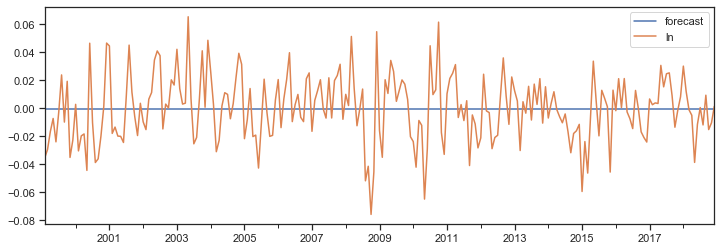

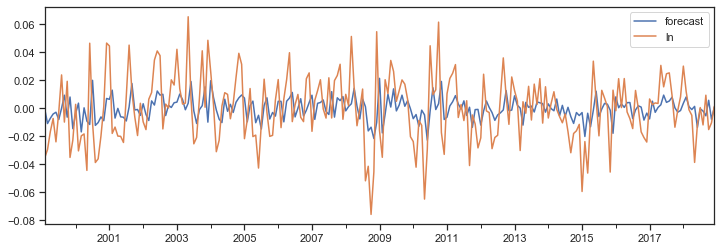

In [103]:
model_arma_fit_aic.plot_predict()
model_arma_fit_bic.plot_predict()
plt.show()

The second model is much better, the residuals of the first model do not follow a white noise process.

In [112]:
#8
prediction_bic = model_arma_fit_bic.forecast(steps=12)[0]
prediction_bic

array([ 8.20248244e-04, -2.75622992e-03,  1.12362815e-03, -1.77085136e-03,
        7.45181863e-04,  4.74379766e-04, -6.46046049e-04, -6.49854977e-04,
        2.84573839e-04, -3.93650455e-04, -2.84365262e-06, -2.31294578e-04])

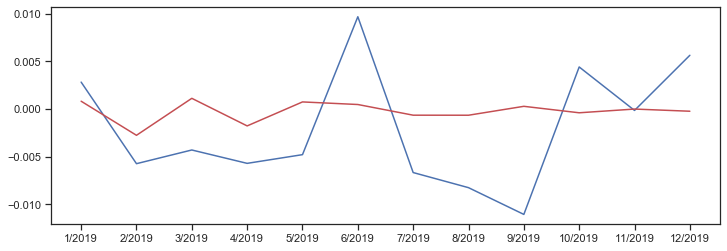

In [114]:
plt.plot(r_diff[239:])
plt.plot(prediction_bic,color='r')
plt.show()

In [115]:
prediction_aic = model_arma_fit_aic.forecast(steps=12)[0]
prediction_aic

array([-8.24050266e-05, -8.24050266e-05, -8.24050266e-05, -8.24050266e-05,
       -8.24050266e-05, -8.24050266e-05, -8.24050266e-05, -8.24050266e-05,
       -8.24050266e-05, -8.24050266e-05, -8.24050266e-05, -8.24050266e-05])

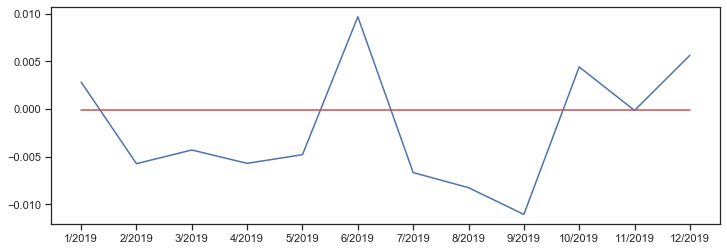

In [119]:
plt.plot(r_diff[239:])
plt.plot(prediction_aic,color='r')
plt.show()

In [141]:
#9
from sklearn.metrics import mean_squared_error
y_true = r_diff[239:]
y_pred = prediction_aic
mean_squared_error(y_true, y_pred)

4.087715644582641e-05

In [142]:
y_true = r_diff[239:]
y_pred = prediction_bic
mean_squared_error(y_true, y_pred)

3.77680533226895e-05

MSE for bic is better

In [144]:
from sklearn.metrics import mean_absolute_error
y_true = r_diff[239:]
y_pred = prediction_aic
mean_absolute_error(y_true, y_pred)

0.005738291212564187

In [145]:
y_true = r_diff[239:]
y_pred = prediction_bic
mean_absolute_error(y_true, y_pred)

0.0054039157981619

the same result. the model for bic is better

In [146]:
from sklearn.metrics import median_absolute_error
y_true = r_diff[239:]
y_pred = prediction_aic
median_absolute_error(y_true, y_pred)

0.005633477936524272

In [147]:
y_true = r_diff[239:]
y_pred = prediction_bic
median_absolute_error(y_true, y_pred)

0.005475950044435466